# Imbalanced Classification With Python

***This is my notes of 7-day Mini-Course (created by Jason Brownlee) <br>*** *May have some classmates insights*

This crash course is broken down into 7 lessons.

* Lesson 01: Challenge of Imbalanced Classification
* Lesson 02: Intuition for Imbalanced Data
* Lesson 03: Evaluate Imbalanced Classification Models
* Lesson 04: Undersampling the Majority Class
* Lesson 05: Oversampling the Minority Class
* Lesson 06: Combine Data Undersampling and Oversampling
* Lesson 07: Cost-Sensitive Algorithms

## Challenge of Imbalanced Classification
* Learners = representation + evaluation + optimization => Machine Learning <br>
were designed around the assumption of an **equal number of examples for each class**

* **Imbalanced data**: the classes are not represented equally. This results in models <br> that have poor predictive performance, specifically for the minority class. 
    * This is a problem because typically, the **minority class** is more important and <br> therefore the problem is more sensitive to classification errors <br> for the minority class than the majority class. 
* Most classification data sets do not have exactly equal number of instances in each class, <br>
 but a small difference often does not matter. 
* Many of the classification predictive modeling problems that we are interested in <br> solving in practice are imbalanced.

**Ten general examples of problems that inherently have a class imbalanced**

1. Fraud detection. There are much more good clients 
2. Weed detection from plant attributes
3. Predicting customer churn behavior in telemarketing
4. Airport security profiling travelers for terrorist threat. (TSA pre-check etc.)
5. Legitimate vs spam email
6. Automatic detection of defects in mass-produced products
7. Any anomaly detection 
    * Detecting patients with rare genetic diseases in medical databases
    * Normal ocean waves sensor data vs tsunami waves
    * Predicting skin cancer from medical images 
    * Intrusion Detection
8. Datacenter malfunction conditions of servers
9. COVID-19 exposure detection
10. Sentiment analysis where we see more positive reviews

## Intuition for Imbalanced Data

A challenge for beginners working with imbalanced classification problems <br> 
is what a specific skewed class distribution means. For example, <br> **what is the difference and implication for a 1:10 vs. a 1:100 class ratio?** <br>

scikit-learn method [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

Counter({0: 990, 1: 10})


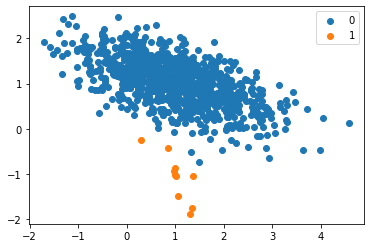

In [79]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01], flip_y=0)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

This plot provides a visual intuition for what exactly a 99 percent vs. 1 <br>
percent majority/minority class imbalance looks like in practice.


## Evaluate Imbalanced Classification Models

How to evaluate models on imbalanced classification problems?
* Prediction accuracy is the most common metric for classification tasks (although it is inappropriate and potentially dangerously misleading when used on imbalanced classification). *e.g.: if 98 percent of the data belongs to the negative class, you can achieve 98 percent accuracy on average by simply predicting the negative class all the time, achieving a score that naively looks good, but in practice has no skill.*

Instead, alternate performance metrics must be adopted:
* **Precision** calculates the ratio of the number of correctly predicted positive examples divided by the total number of positive examples that were predicted. **Maximizing** the precision will minimize the false positives. 

\begin{equation}
\tag{1}
Precision= \frac{TP}{TP+FP}
\end{equation}


* **Recall** predicts the ratio of the total number of correctly predicted positive examples divided by the total number of positive examples that could have been predicted. **Maximizing** recall will minimize false negatives. 
\begin{equation}
\tag{2}
Recall = \frac{TP}{TP+FN}
\end{equation}

* **F-measure**: the performance of a model can be summarized by F-measure that averages both the precision and the recall. **Maximizing** the F-Measure will maximize both the precision and recall at the same time
\begin{equation}
\tag{3}
Fmeasure = \frac{2 * Precision * Recall}{Precision + Recall}
\end{equation}

The example below fits a logistic regression model on an imbalanced classification problem and calculates the accuracy, which can then be compared to the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [F-measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).

In [9]:
# evaluate imbalanced classification model with different metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f'  % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f'    % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))
print('ROC AUC:  %.3f'  % roc_auc_score(testy, yhat))

Accuracy: 0.995
Precision: 1.000
Recall: 0.460
F-measure: 0.630
ROC AUC:  0.730
